<a href="https://colab.research.google.com/github/kimsojeong1225/DeepLearning/blob/master/kerasRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6.1 텍스트 데이터 다루기

## 6.1.1 단어와 문자의 원-핫 인코딩

### 코드 6-1 : 단어 수준의 원-핫 인코딩하기

In [0]:
import numpy as np
samples=['the cat sat on the mat','the dog ate my homework']

In [0]:
token_index={}

for sample in samples:
  for word in sample.split():
    if word not in token_index:
      token_index[word]=len(token_index)+1

In [0]:
token_index  #알파벳 순으로 자동정렬되는군

{'ate': 7,
 'cat': 2,
 'dog': 6,
 'homework': 9,
 'mat': 5,
 'my': 8,
 'on': 4,
 'sat': 3,
 'the': 1}

In [0]:
max_length=10

results=np.zeros(shape=(len(samples),
                        max_length,
                        max(token_index.values())+1))

In [0]:
results.shape

(2, 10, 10)

In [0]:
results

array([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]

In [0]:
for i,sample in enumerate(samples):
  for j,word in list(enumerate(sample.split()))[:max_length]:
    index=token_index.get(word)
    results[i,j,index]=1.

In [0]:
results.shape

(2, 10, 10)

In [0]:
results

array([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]

### 코드 6-2 : 문자 수준의 원-핫 인코딩하기

In [0]:
import string

samples=['The cat sat on the mat.','The dog ate my homework.']
characters=string.printable
token_index=dict(zip(characters,range(1,len(characters)+1)))

In [0]:
characters

'0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ \t\n\r\x0b\x0c'

In [0]:
token_index

{'\t': 96,
 '\n': 97,
 '\x0b': 99,
 '\x0c': 100,
 '\r': 98,
 ' ': 95,
 '!': 63,
 '"': 64,
 '#': 65,
 '$': 66,
 '%': 67,
 '&': 68,
 "'": 69,
 '(': 70,
 ')': 71,
 '*': 72,
 '+': 73,
 ',': 74,
 '-': 75,
 '.': 76,
 '/': 77,
 '0': 1,
 '1': 2,
 '2': 3,
 '3': 4,
 '4': 5,
 '5': 6,
 '6': 7,
 '7': 8,
 '8': 9,
 '9': 10,
 ':': 78,
 ';': 79,
 '<': 80,
 '=': 81,
 '>': 82,
 '?': 83,
 '@': 84,
 'A': 37,
 'B': 38,
 'C': 39,
 'D': 40,
 'E': 41,
 'F': 42,
 'G': 43,
 'H': 44,
 'I': 45,
 'J': 46,
 'K': 47,
 'L': 48,
 'M': 49,
 'N': 50,
 'O': 51,
 'P': 52,
 'Q': 53,
 'R': 54,
 'S': 55,
 'T': 56,
 'U': 57,
 'V': 58,
 'W': 59,
 'X': 60,
 'Y': 61,
 'Z': 62,
 '[': 85,
 '\\': 86,
 ']': 87,
 '^': 88,
 '_': 89,
 '`': 90,
 'a': 11,
 'b': 12,
 'c': 13,
 'd': 14,
 'e': 15,
 'f': 16,
 'g': 17,
 'h': 18,
 'i': 19,
 'j': 20,
 'k': 21,
 'l': 22,
 'm': 23,
 'n': 24,
 'o': 25,
 'p': 26,
 'q': 27,
 'r': 28,
 's': 29,
 't': 30,
 'u': 31,
 'v': 32,
 'w': 33,
 'x': 34,
 'y': 35,
 'z': 36,
 '{': 91,
 '|': 92,
 '}': 93,
 '~': 94

In [0]:
max_length=50
results=np.zeros((len(samples),max_length,max(token_index.values())+1))
results.shape

(2, 50, 101)

In [0]:
for i,sample in enumerate(samples):
  for j,character in enumerate(sample):
    print('j',j,'character',character)
    index=token_index.get(character)
    results[i,j,index]=1.

j 0 character T
j 1 character h
j 2 character e
j 3 character  
j 4 character c
j 5 character a
j 6 character t
j 7 character  
j 8 character s
j 9 character a
j 10 character t
j 11 character  
j 12 character o
j 13 character n
j 14 character  
j 15 character t
j 16 character h
j 17 character e
j 18 character  
j 19 character m
j 20 character a
j 21 character t
j 22 character .
j 0 character T
j 1 character h
j 2 character e
j 3 character  
j 4 character d
j 5 character o
j 6 character g
j 7 character  
j 8 character a
j 9 character t
j 10 character e
j 11 character  
j 12 character m
j 13 character y
j 14 character  
j 15 character h
j 16 character o
j 17 character m
j 18 character e
j 19 character w
j 20 character o
j 21 character r
j 22 character k
j 23 character .


In [0]:
(results[0])[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### 코드 6-3 : 케라스를 사용한 단어 수준의 원-핫 인코딩하기

In [0]:
from keras_preprocessing.text import Tokenizer

samples=['The cat sat on the mat.','The dog ate my homework']
tokenizer=Tokenizer(num_words=1000)  #빈도 높은 1000개 단어 선택하는 토크나이저 객체 만들기
tokenizer.fit_on_texts(samples) #단어 인덱스 구축

sequences=tokenizer.texts_to_sequences(samples) # 문자열을 정수형 인덱스의 리스트로 반환

one_hot_results=tokenizer.texts_to_matrix(samples,mode='binary') #원핫 이진 벡터 표현을 얻음

word_index=tokenizer.word_index #계산된 단어 인덱스를 구함
print('%s개의고유한 토큰을 찾았습니다.'%len(word_index))

9개의고유한 토큰을 찾았습니다.


In [0]:
one_hot_results

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [0]:
word_index

{'ate': 7,
 'cat': 2,
 'dog': 6,
 'homework': 9,
 'mat': 5,
 'my': 8,
 'on': 4,
 'sat': 3,
 'the': 1}

### 코드 6-4 : 해싱 기법을 사용한 단어 수준의 원-핫 인코딩하기

In [0]:
samples=['The cat sat on the mat.','The dog ate my homework.']

dimensionality=1000
max_length=10

results=np.zeros((len(samples),max_length,dimensionality))

for i,sample in enumerate(samples):
  for j,word in list(enumerate(sample.split()))[:max_length]:
    index=abs(hash(word))%dimensionality
    print(index)
    results[i,j,index]=1.

42
544
827
504
913
37
42
499
346
363
206


In [0]:
results

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

## 6.1.2 단어 임베딩 사용하기

#### 코드 6-5: Embedding 층의 객체 생성하기

In [0]:
from tensorflow.keras.layers import Embedding

embedding_layer=Embedding(1000,64)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


#### 코드6-6: Embedding 층에 사용할 IMDB 데이터 로드하기

In [0]:
from keras.datasets import imdb
from keras import preprocessing

max_features=10000
maxlen=20

(x_train,y_train),(x_test,y_test)=imdb.load_data(
    num_words=max_features
)


17465344/17464789 [==============================] - 1s 0us/step


In [0]:
x_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [0]:
x_train.shape

(25000,)

In [0]:
# 리스트를 (samples,maxlen)크기의 2D정수 텐서로 변환
x_train=preprocessing.sequence.pad_sequences(x_train,maxlen=maxlen)
x_test=preprocessing.sequence.pad_sequences(x_test,maxlen=maxlen)

In [0]:
x_train.shape

(25000, 20)

In [0]:
x_train

array([[  65,   16,   38, ...,   19,  178,   32],
       [  23,    4, 1690, ...,   16,  145,   95],
       [1352,   13,  191, ...,    7,  129,  113],
       ...,
       [  11, 1818, 7561, ...,    4, 3586,    2],
       [  92,  401,  728, ...,   12,    9,   23],
       [ 764,   40,    4, ...,  204,  131,    9]], dtype=int32)

#### 코드6-7: IMDB 데이터에 Embedding 층과 분류기 사용

In [0]:
from keras.models import Sequential
from keras.layers import Flatten,Dense,Embedding

model=Sequential()
model.add(Embedding(10000,8,input_length=maxlen))
model.add(Flatten()) # 3D텐서를 2D텐서로 펼침
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

model.summary()



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_3 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [0]:
history=model.fit(x_train,y_train,
                  epochs=10,
                  batch_size=32,
                  validation_split=0.2)




Train on 20000 samples, validate on 5000 samples
Epoch 1/10





20000/20000 [==============================] - 2s 89us/step - loss: 0.6694 - acc: 0.6264 - val_loss: 0.6196 - val_acc: 0.7052
Epoch 2/10
20000/20000 [==============================] - 1s 61us/step - loss: 0.5440 - acc: 0.7509 - val_loss: 0.5285 - val_acc: 0.7276
Epoch 3/10
20000/20000 [==============================] - 1s 63us/step - loss: 0.4621 - acc: 0.7870 - val_loss: 0.5020 - val_acc: 0.7430
Epoch 4/10
20000/20000 [==============================] - 1s 62us/step - loss: 0.4210 - acc: 0.8080 - val_loss: 0.4964 - val_acc: 0.7476
Epoch 5/10
20000/20000 [==============================] - 1s 62us/step - loss: 0.3924 - acc: 0.8239 - val_loss: 0.4969 - val_acc: 0.7508
Epoch 6/10
20000/20000 [==============================] - 1s 61us/step - loss: 0.3692 - acc: 0.8363 - val_loss: 0.4999 - val_acc: 0.7490
Epoch 7/10
20000/20000 [==============================] - 1s 62us/step - loss: 0.3478 - acc: 0.8492 - val_loss: 0.5057 - 

### 6.1.3 모든 내용을 적용하기 : 원본 텍스트에서 단어 임베딩까지

In [0]:
print('a')

a


#### 코드6-8: IMDB 원본 데이터 전처리하기

In [0]:
import os

imdb_dir='./aclImdb'
train_dir=os.path.join(imdb_dir,'train')

labels=[]
texts=[]

for label_type in ['neg','pos']:
  dir_name=os.path.join(train_dir,label_type)
  for fname in os.listdir(dir_name):
    if[-4:]=='.txt':
      f=open(os.path.join(dir_name,fname),encoding='utf-8')
      texts.append(f.read())
      f.close()
      if label_type=='neg':
        labels.append(0)
      else:
        labels.append(1)

#### 코드6-9:IMDB 원본 데이터의 텍스트를 토큰화하기

In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen=100
training_samples=200
validation_samples=10000
max_words=10000

tokenizer=Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts) #단어 인덱스 구축
sequences=tokenizer.texts_to_sequences(texts)

word_index=tokenizer.word_index #계산된 단어 인덱스를 구함
print("%s개의 고유한 토큰을 찾았습니다.",%len(word_index))

data=pad_sequences(sequences,maxlen=maxlen) #리스트 -> 2d 정수텐서
labels=np.asarray(labels)
print('데이터 텐서의 크기:',data.shape)
print('레이블 텐서의 크기:',labels.shape)

indices=np.arange(data.shape[0])
np.random.shuffle(indices)
data=data[indices]
labels=labels[indices]

x_train=data[:training_samples]
y_train=labels[:training_samples]
x_val=data[training_samples:training_samples+validation_samples]
y_val=labels[training_samples:training_samples+validation_samples]

#### 코드6-10:GloVe단어 임베딩 파일 파싱하기

In [0]:
glove='./datasets/'

embeddings_index={}
f=open(os.path.join(glove_dir,'glove.6B.100d.txt'),encoding='utf-8')
for line in f:
  values=line.split()
  word=values[0]
  coefs=np.asarray(values[1:],dtype='float32')
  embeddings_index[word]=coefs
f.close()
print('%s개의 벡터를 찾았습니다.',%len(embeddings_index))

#### 코드6-11:Glove 단어 임베딩 행렬 준비하기

In [0]:
embedding_dim=100

embedding_matrix=np.zeros((max_words,embedding_dim))
for word,i in word_index.items():
  if i<max_words:
    embedding_vector=embeddings_index.get(word)
    if embedding_vector is not None:
      embedding_matrix[i]=embedding_vector

#### 코드6-12: 모델 정의하기

In [0]:
from keras.models import Sequential
from keras.layers import embeddings,Dense,Flatten

model=Sequential()
model.add(Embedding(max_words,embedding_dim,input_length=maxlen))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

#### 코드6-13:사전 훈련된 단어 임베딩을 Embedding층에 로드하기

In [0]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable=False

#### 코드6-14:훈련과 평가

In [0]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history=model.fit(x_train,y_train,
                  epochs=10,
                  batch_size=32,
                  validation_data=(x_val,y_val))
model.save_weights('pre_trained_glove_model.h5')

#### 코드6-15:결과 그래프 그리기

In [0]:
import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,loss,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

#### 코드6-16:사전 훈련된 단어 임베딩을 사용하지않고 같은 모델 훈련하기
##### (해당 작업에 특화된 입력 토큰의 임베딩 학습)

In [0]:
from keras.models import Sequential
from keras.layers import Dense,Embedding,Flatten

model=Sequential()
model.add(Embedding(max_words,embedding_dim,input_length=maxlen))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

In [0]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history=model.fit(x_train,y_train,
                  epochs=10,
                  batch_size=32,
                  validation_data=(x_val,y_val))

In [0]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,loss,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

#### 연습문제 ? : 훈련 샘플의 수를 늘려서 훈련시켜보기 (2000개)

#### 코드6-17:테스트 데이터 토큰화하기

In [0]:
test_dir=os.path.join(imdb_dir,'test')

labels=[]
texts=[]

for label_type in ['neg','pos']:
  dir_name=os.path.join(test_dir,label_type)
  for fname in sorted(os.listdir(dir_name)):
    if fname[-4:]=='.txt':
      f=open(os.path.join(dir_name,fname),encoding='utf-8')
      texts.append(f.read())
      f.close()
      if label_type=='neg':
        labels.append(0)
      else:
        labels.appen(1)
  
sequneces = tokenizer.texts_to_sequences(texts)
x_test=pad_sequences(sequences,maxlen=maxlen)
y_test=np.asarray(labels)

#### 코드6-18:테스트 세트에서 모델 평가하기

In [0]:
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test,y_test)

# 6.2 순환 신경망 이해하기

#### 코드6-21:넘파이로 구현한 간단한 RNN

In [0]:
import numpy as np

timesteps=100
input_features=32
output_features=64

inputs=np.random.random((timesteps,input_features))

state_t=np.zeros((output_features,)) 

W=np.random.random((output_features,input_features))
U=np.random.random((output_features,output_features))
b=np.random.random((output_features,))

successive_outputs=[]
for input_t in inputs:
  output_t=np.tanh(np.dot(W,input_t)+np.dot(U,state_t)+b)
  successive_outputs.append(output_t)
  state_t=output_t

final_output_sequence=np.stack(successive_outputs,axis=0)

In [0]:
inputs

array([[0.10747344, 0.99544624, 0.98155241, ..., 0.51367351, 0.44328592,
        0.77606557],
       [0.5171035 , 0.75309003, 0.41442087, ..., 0.85468372, 0.65122853,
        0.03970984],
       [0.47383324, 0.53799443, 0.19626778, ..., 0.65353619, 0.20118399,
        0.6443465 ],
       ...,
       [0.20675618, 0.31823422, 0.49045251, ..., 0.27684682, 0.84478434,
        0.28146963],
       [0.79814297, 0.72382519, 0.32345297, ..., 0.89714206, 0.9495489 ,
        0.70170617],
       [0.23477901, 0.55790577, 0.2022032 , ..., 0.04060959, 0.01561085,
        0.01995359]])

### 6.2.1 케라스의 순환 층

#### Keras SimpleRNN 두 가지 모드
#### 1. 각 타임스텝의 출력을 모은 전체 시퀀스 반환
#### 2. 입력 시퀀스에 대한 마지막 출력만 반환

In [0]:
from keras.models import Sequential
from keras.layers import SimpleRNN,Embedding

In [0]:
# 1. 전체 상태 시퀀스 반환
model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32,return_sequences=True)) # return_sequences옵션 True로!
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [0]:
# 2. 마지막 타임스텝의 출력만 얻음
model=Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [0]:
# 여러 개의 순환층을 차례대로 쌓는 경우
model=Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32,return_sequences=True))
model.add(SimpleRNN(32,return_sequences=True))
model.add(SimpleRNN(32,return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


#### 코드 6-22: IMDB 데이터 전처리하기

In [0]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features=10000
maxlen=500
batch_size=32

print('데이터 로딩...')
(input_train,y_train),(input_test,y_test)=imdb.load_data(
    num_words=max_features
)
print(len(input_train),'훈련 시퀀스')
print(len(input_test),'테스트 시퀀스')

print('시퀀스 패딩(samples x time')

input_train=sequence.pad_sequences(input_train,maxlen=maxlen)
input_test=sequence.pad_sequences(input_test,maxlen=maxlen)
print('input_train크기: ',input_train.shape)
print('input_test크기: ',input_test.shape)

데이터 로딩...
25000 훈련 시퀀스
25000 테스트 시퀀스
시퀀스 패딩(samples x time
input_train크기:  (25000, 500)
input_test크기:  (25000, 500)


#### 코드 6-23: Embedding층과 SimpleRNN층을 사용한 모델 훈련하기

In [0]:
from keras.layers import Dense,Embedding,SimpleRNN
from keras.models import Sequential

model=Sequential()
model.add(Embedding(max_features,32))
model.add(SimpleRNN(32))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history=model.fit(input_train,y_train,
                  epochs=10,
                  batch_size=128,
                  validation_split=0.2)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 20000 samples, validate on 5000 samples
Epoch 1/10





20000/20000 [==============================] - 16s 792us/step - loss: 0.5824 - acc: 0.6825 - val_loss: 0.5507 - val_acc: 0.7194
Epoch 2/10
20000/20000 [==============================] - 15s 750us/step - loss: 0.3695 - acc: 0.8457 - val_loss: 0.4101 - val_acc: 0.8196
Epoch 3/10
20000/20000 [==============================] - 15s 767us/step - loss: 0.2868 - acc: 0.8884 - val_loss: 0.4715 - val_acc: 0.7768
Epoch 4/10
20000/20000 [==============================] - 15s 750us/step - loss: 0.2250 - acc: 0.9149 - val_loss: 0.3865 - val_acc: 0.8382
Epoch 5/10
20000/20000 [==============================] - 15s 754us/step - loss: 0.1800 - acc: 0.9343 - val_loss: 0.4107 - val_acc: 0.8374
Epoch 6/10
20000/20000 [==============================] - 15s 739us/step - loss: 0.1301 - acc: 0.9539 - val_loss: 0.5588 - val_acc: 0.8138
Epoch 7/10
20

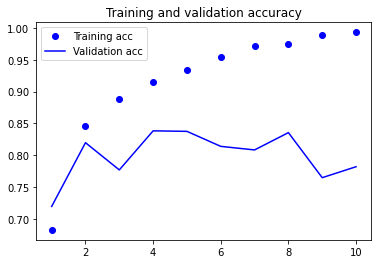

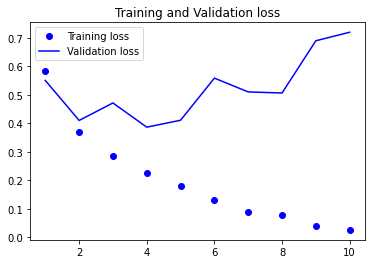

In [0]:
import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

### 6.2.3 케라스를 사용한 LSTM 예제

#### 코드 6-27 : 케라스에서 LSTM층 사용하기

In [0]:
from keras.layers import LSTM
model=Sequential()
model.add(Embedding(max_features,32))
model.add(LSTM(32))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history=model.fit(input_train,y_train,
                  epochs=10,
                  batch_size=128,
                  validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 78s 4ms/step - loss: 0.5059 - acc: 0.7570 - val_loss: 0.3463 - val_acc: 0.8550
Epoch 2/10
20000/20000 [==============================] - 78s 4ms/step - loss: 0.2928 - acc: 0.8836 - val_loss: 0.2920 - val_acc: 0.8850
Epoch 3/10
20000/20000 [==============================] - 79s 4ms/step - loss: 0.2336 - acc: 0.9117 - val_loss: 0.2870 - val_acc: 0.8820
Epoch 4/10
20000/20000 [==============================] - 81s 4ms/step - loss: 0.1987 - acc: 0.9263 - val_loss: 0.2967 - val_acc: 0.8846
Epoch 5/10
20000/20000 [==============================] - 84s 4ms/step - loss: 0.1773 - acc: 0.9356 - val_loss: 0.2968 - val_acc: 0.8844
Epoch 6/10
20000/20000 [==============================] - 83s 4ms/step - loss: 0.1599 - acc: 0.9429 - val_loss: 0.4033 - val_acc: 0.8458
Epoch 7/10
20000/20000 [==============================] - 82s 4ms/step - loss: 0.1478 - acc: 0.9492 - val_loss: 0.6862 - val_acc:

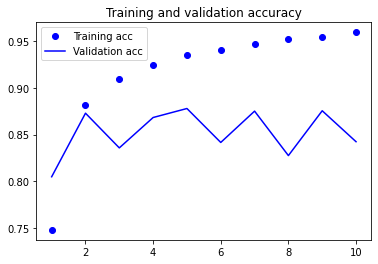

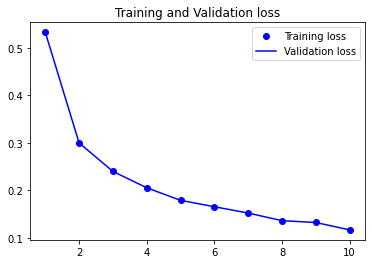

In [0]:
import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,loss,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

## 6.3 순환 신경망의 고급 사용법

*   순환 드롭아웃
*   스태킹 순환 층
*   양방향 순환 층



### 6.3.1 기온 예측 문제

#### 코드 6-28 : 예나의 날씨 데이터셋 조사하기

In [0]:
import os

data_dir='./jena_climate'
fname=os.path.join(data_dir,'jena_climate_2009_2016.csv')

f=open(fname)
data=f.read()
f.close()

lines=data.split('\n')
header=lines[0].split(',')
lines=lines[1:]

print('header :',header)
print(len(lines))

header : ['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420551


#### 코드 6-29 : 데이터 파싱하기

In [0]:
import numpy as np

float_data=np.zeros((len(lines),len(header)-1))
for i,line in enumerate(lines):
  values=[float(x) for x in line.split(',')[1:]]
  float_data[i,:]=values

#### 코드 6-30 : 시계열 온도 그래프 그리기

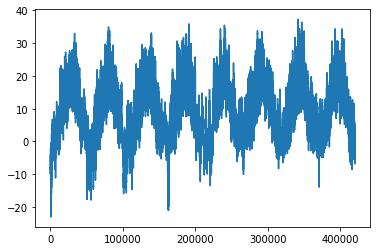

In [0]:
from matplotlib import pyplot as plt

temp=float_data[:,1]
plt.plot(range(len(temp)),temp)

#### 코드 6-31 : 처음 10일간 온도 그래프 그리기

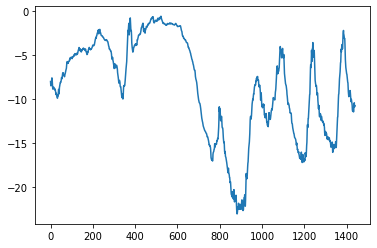

In [0]:
plt.plot(range(1440),temp[:1440])

#### 코드 6-32 : 데이터 정규화하기

In [0]:
mean = float_data[:200000].mean(axis=0)
float_data -= mean
std = float_data[:200000].std(axis=0)
float_data /= std

In [0]:
std

array([ 8.48043388,  8.85249908,  8.95324185,  7.16584991, 16.72731652,
        7.68914559,  4.19808168,  4.84034436,  2.66564926,  4.25206364,
       42.48884277,  1.53666449,  2.33067298, 86.61322998])

#### 코드 6-33 : 시계열 데이터와 타깃을 반환하는 제너레이터 함수

In [0]:

def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows),
                           lookback // step,
                           data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets

#### 코드 6-34 : 훈련,검증,테스트 제너레이터 준비하기

In [0]:
lookback=1440 #10일 전
step=6 #1시간마다 데이터 포인트 하나를 샘플링
delay=144 #24시간이 지난 데이터가 타깃
batch_size=128

train_gen=generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=0,
                    max_index=200000,
                    shuffle=True,
                    step=step,
                    batch_size=batch_size)
val_gen=generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=300000,
                    step=step,
                    batch_size=batch_size)
test_gen=generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=300001,
                    max_index=None,
                    step=step,
                    batch_size=batch_size)

# generator()함수는 while문을 사용하여 무한반복되기 때문에 검증 세트와 테스트 세트를
# 한 번 순회하는 횟수를 알려주어야함
val_steps=(300000-200001-lookback)//batch_size #전체 검증 세트를 순회하기 위해 val_gen에서 추출할 횟수
test_steps=(len(float_data)-300001-lookback)//batch_size 

In [0]:
lookback = 1440
step = 6
delay = 144
batch_size = 128

train_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      step=step, 
                      batch_size=batch_size)
val_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=300000,
                    step=step,
                    batch_size=batch_size)
test_gen = generator(float_data,
                     lookback=lookback,
                     delay=delay,
                     min_index=300001,
                     max_index=None,
                     step=step,
                     batch_size=batch_size)

# 전체 검증 세트를 순회하기 위해 val_gen에서 추출할 횟수
val_steps = (300000 - 200001 - lookback) // batch_size

# 전체 테스트 세트를 순회하기 위해 test_gen에서 추출할 횟수
test_steps = (len(float_data) - 300001 - lookback) // batch_size

### 상식 수준의 기준점

#### 코드 6-35 : 상식적인 기준 모델의 MAE 계산하기

In [0]:
def evaluate_naive_method():
  batch_maes=[]
  for step in range(val_steps):
    samples,targets=next(val_gen)
    preds=samples[:,-1,1]
    mae=np.mean(np.abs(preds-targets))
    batch_maes.append(mae)
  print(np.mean(batch_maes))

evaluate_naive_method()

0.2897359729905486


#### 코드 6-36: MAE를 섭씨 단위로 변환하기

In [0]:
0.29*std[1]

2.5672247338393395

### 6.3.4 기본적인 머신 러닝 방법

#### 코드 6-37: 완전 연결 모델을 훈련하고 평가하기

In [0]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model=Sequential()
model.add(layers.Flatten(input_shape=(lookback//step,float_data.shape[-1])))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(),loss='mae')
history=model.fit_generator(train_gen,
                            steps_per_epoch=500,
                            epochs=20,
                            validation_data=val_gen,
                            validation_steps=val_steps)

Using TensorFlow backend.









Epoch 1/20





500/500 [==============================] - 15s 30ms/step - loss: 1.5681 - val_loss: 1.8922
Epoch 2/20
500/500 [==============================] - 14s 28ms/step - loss: 3.2660 - val_loss: 6.9811
Epoch 3/20
497/500 [============================>.] - ETA: 0s - loss: 6.6774

KeyboardInterrupt: ignored

In [0]:
lookback//step

240

In [0]:
float_data.shape[-1]

14

#### 코드6-38 : 결과 그래프 그리기

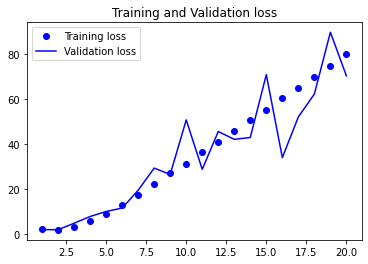

In [0]:
import matplotlib.pyplot as plt


loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(loss)+1)
plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

### 6.3.5 첫 번째 순환 신경망

#### 코드 6-39 : GRU를 사용한 모델을 훈련하고 평가하기

In [0]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model=Sequential()
model.add(layers.GRU(32,input_shape=(None,float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(),loss='mae')
history=model.fit_generator(train_gen,
                            steps_per_epoch=500,
                            epochs=20,
                            validation_data=val_gen,
                            validation_steps=val_steps)

In [0]:
import matplotlib.pyplot as plt


loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(loss)+1)
plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

### 6.3.6 과대적합을 감소하기 위해 순환 드롭아웃 사용하기

In [0]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model=Sequential()
model.add(layers.GRU(32,
                     dropout=0.2,
                     recurrent_dropout=0.2,
                     input_shape=(None,float_data.shape[-1]))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(),loss='mae')
history=model.fit_generator(train_gen,
                            steps_per_epoch=500,
                            epochs=40,
                            validation_data=val_gen,
                            validation_steps=val_steps)

### 6.3.7 스태킹 순환 층

#### 코드 6-41 : 드롭아웃으로 규제하고 스태킹한 GRU 모델을 훈련하고 평가하기

In [0]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model=Sequential()
model.add(layers.GRU(32,
                     dropout=0.1,
                     recurrent_dropout=0.5,
                     return_sequences=True,
                     input_shape=(None,float_data.shape[-1]))
model.add(layers.GRU(64,activation='relu',
                     dropout=0.1,
                     recurrent_dropout=0.5))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(),loss='mae')
history=model.fit_generator(train_gen,
                            steps_per_epoch=500,
                            epochs=40,
                            validation_data=val_gen,
                            validation_steps=val_steps)

### 6.3.8 양방향 RNN 사용하기

#### 코드 6-42 :거꾸로 된 시퀀스를 사용한 LSTM을 훈련하고 평가하기

In [0]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

max_features=10000
maxlen=50

(x_train,y_train),(x_test,y_test)=imdb.load_data(
    num_words=max_features
)

#시퀀스 뒤집음
x_train=[x[::-1]for x in x_train]
x_test=[x[::-1]for x in x_test]

x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

model=Sequential()
model.add(layers.Embedding(max_features,128))
model.add(layers.LSTM(32))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history=model.fit(x_train,y_train,
                  epochs=10,
                  batch_size=128,
                  validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 13s 647us/sample - loss: 0.5451 - acc: 0.7163 - val_loss: 0.4849 - val_acc: 0.7678
Epoch 2/10
20000/20000 [==============================] - 12s 607us/sample - loss: 0.3936 - acc: 0.8263 - val_loss: 0.4839 - val_acc: 0.7640
Epoch 3/10
20000/20000 [==============================] - 12s 614us/sample - loss: 0.3431 - acc: 0.8545 - val_loss: 0.4724 - val_acc: 0.7722
Epoch 4/10
20000/20000 [==============================] - 12s 608us/sample - loss: 0.3065 - acc: 0.8688 - val_loss: 0.5195 - val_acc: 0.7612
Epoch 5/10
20000/20000 [==============================] - 12s 609us/sample - loss: 0.2752 - acc: 0.8857 - val_loss: 0.5809 - val_acc: 0.7618
Epoch 6/10
20000/20000 [==============================] - 12s 609us/sample - loss: 0.2468 - acc: 0.8981 - val_loss: 0.5269 - val_acc: 0.7590
Epoch 7/10
20000/20000 [==============================] - 12s 606us/sample - loss: 0.2197 - acc: 0.9117 -

#### 코드 6-43 : 양방향 LSTM을 훈련하고 평가하기

In [0]:
model=Sequential()
model.add(layers.Embedding(max_features,32))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history=model.fit(x_train,y_train,
                  epochs=10,
                  batch_size=128,
                  validation_split=0.2)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 16s 802us/sample - loss: 0.5684 - acc: 0.6865 - val_loss: 0.5032 - val_acc: 0.7606
Epoch 2/10
20000/20000 [==============================] - 15s 749us/sample - loss: 0.4119 - acc: 0.8153 - val_loss: 0.4833 - val_acc: 0.7754
Epoch 3/10
20000/20000 [==============================] - 15s 738us/sample - loss: 0.3525 - acc: 0.8480 - val_loss: 0.6354 - val_acc: 0.7160
Epoch 4/10
20000/20000 [==============================] - 15s 740us/sample - loss: 0.3168 - acc: 0.8655 - val_loss: 0.4946 - val_acc: 0.7652
Epoch 5/10
20000/20000 [=========

#### 코드 6-44 : 양방향 GRU을 훈련하고 평가하기

In [0]:
from tensorflow.keras.optimizers import RMSprop

model=Sequential()
model.add(layers.Bidirectional(layers.GRU(32),input_shape=(None,float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(),
              loss='mae')
history=model.fit_generator(train_gen,
                  steps_per_epoch=500,
                  epochs=40,
                  validation_data=val_gen,
                  validation_steps=val_steps)

Epoch 1/40
499/500 [============================>.] - ETA: 0s - loss: 0.2900

KeyboardInterrupt: ignored

# 6.4 컨브넷을 사용한 시퀀스 처리